## Kaggle Grocery Store Data Set
### Simple Analysis

In the following excise I take a basic dataset from Kaggle and demonstrate a market basket analysis in Python. This example is for practice before implementing it on different datasets. 

### Purpose
The reason for conducting a market basket analysis is to group products together in transactions. Once we group the transactions we can analyse them to tell if the purchase of one item influences another item. Based on our findings we will recommend whether the gorup items together by location or to promote certain products together.

Lets begin!

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
raw = pd.read_csv('GroceryStoreDataSet.csv', names=['transactions'])
raw

,transactions
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [3]:
lists = list(raw['transactions'].apply(lambda x: x.split(',')))
lists

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [4]:
# Create transaction Encoder then encode purchase lists from list
encoder = TransactionEncoder().fit(lists)

# one hot encode
onehot = encoder.transform(lists)

# Convert to a DataFrame
df = pd.DataFrame(onehot, columns=encoder.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [5]:
# Use apriori alorgithm to slim the data set (Not that this one is very big)
# First by support and second by confidence

frequent = apriori(df, min_support= .15, max_len=3, use_colnames = True).sort_values(by = 'support', ascending = False)
frequent

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
9,0.35,(TEA)
5,0.30,(CORNFLAKES)
8,0.30,(SUGER)
6,0.25,(MAGGI)
7,0.25,(MILK)
15,0.20,"(MILK, BREAD)"
20,0.20,"(COFFEE, SUGER)"


In [6]:
# Use association rules to find the metrics for all of our filtered items

ass = association_rules(frequent, metric='confidence', min_threshold=.5)
ass.sort_values('leverage', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(TEA),(MAGGI),0.35,0.25,0.20,0.571429,2.285714,0.1125,1.750000
8,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.250000
12,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf
1,(COFFEE),(SUGER),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000
2,(SUGER),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000
3,(COFFEE),(CORNFLAKES),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000
4,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000
13,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000
0,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000
11,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000


<AxesSubplot:xlabel='Antecedents', ylabel='Consequents'>

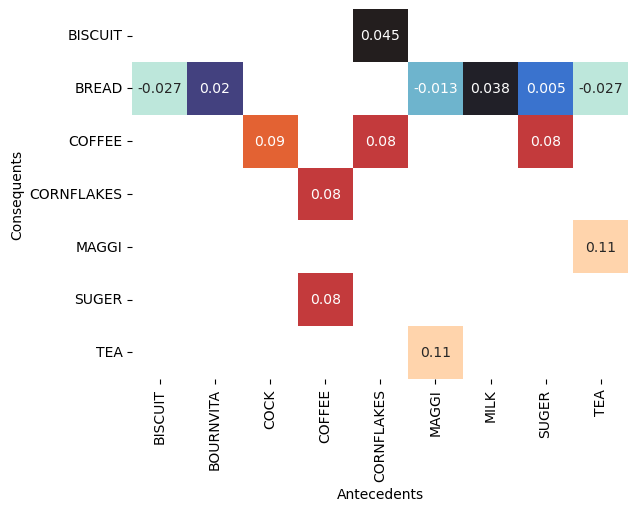

In [7]:
# # Prepare a heatmap using seaborn

ass['Antecedents'] = ass['antecedents'].apply(lambda x: ','.join(list(x)))
ass['Consequents'] = ass['consequents'].apply(lambda x: ','.join(list(x)))
table = ass.pivot(index='Consequents', columns='Antecedents', values = 'leverage')
table
sns.heatmap(table, annot=True, cmap='icefire', cbar = False)


Although this was a basic dataset we can find specific relationships and make recommendations based on them. Typically I prefer to use confidence as a metric in a market basket analysis, however with very few transactions and most of them including bread it won't be the most telling metric. Here leverage will tell us the relationship between two product specifically. Maggi and tea have the strongest relationship with each other so we would recommend grouping them together in the grocery store and possibly a promotion to buy both!


### Steps
*  We started with a dataset as a list
*  We converted the data into a list of lists
*  Used the transaction encode to create a onehot dataframe of logical values
*  Used the apriori algorithm to narrow down the transactions by measuring relationships with a minimum support value of 0.15
*  Used the association rules function to gather all metrics to analyze and present to the marketing and production teams
*  Finally created a heatmap to visualize the relationship based on the leverage metric 